## Facebrain Demo

In [1]:
%cd ..

/Users/zhangshulin_work/Desktop/AI-Play/Git/Facebrain


In [2]:
from facebrain.facebrain import Facebrain
from matplotlib import pylab as plt
import numpy as np
import cv2

%matplotlib inline

/Users/zhangshulin_work/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 创建face_brain实例

In [3]:
face_brain = Facebrain()

INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Restoring parameters from ./facebrain/pretrain_inception_resnet_v1/model-20170512-110547.ckpt
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


### 读取图片

In [4]:
tfboys_file = './demo/images/tfboys.jpeg'
wangjukai_file = './demo/images/王俊凯1.jpeg'

In [5]:
tfboys_img = face_brain.read_image(tfboys_file)
wangjukai_img = face_brain.read_image(wangjukai_file)

(-0.5, 497.5, 279.5, -0.5)

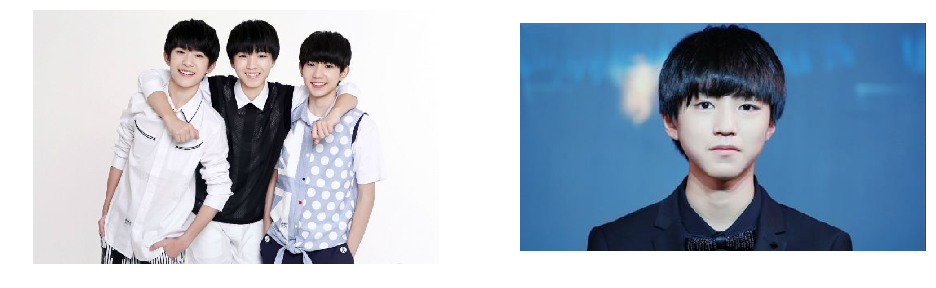

In [6]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 2, 1)
plt.imshow(tfboys_img[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wangjukai_img[0])
plt.axis('off')

### 人脸检测，人脸对齐

In [7]:
tfboys_faces, tfboys_boxes, tfboys_points = face_brain.detect_faces(tfboys_img, adjust_face=True, adjust_angle=0)
wangjukai_face, wangjukai_boxes, wangjukai_points = face_brain.detect_faces(wangjukai_img, adjust_face=True)

(-0.5, 719.5, 449.5, -0.5)

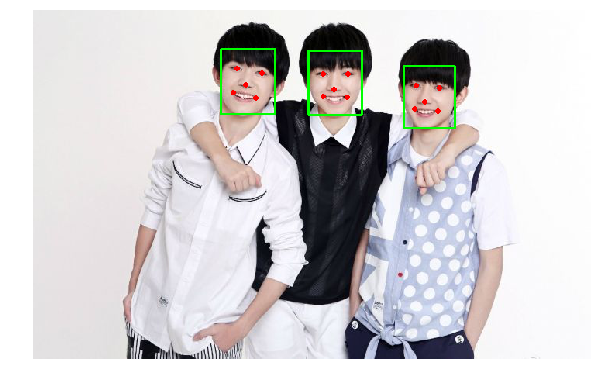

In [8]:
tfboys_img_copy = tfboys_img[0].copy()

for tf_boxes in tfboys_boxes:
    cv2.rectangle(tfboys_img_copy, (tf_boxes[0], tf_boxes[1]), (tf_boxes[2], tf_boxes[3]), (0, 255, 0), 2)
    
for points in tfboys_points.T:
    for i in range(0, 5):
        point = (points[i], points[i+5])
        cv2.circle(tfboys_img_copy, tuple(point), 2, (255, 0, 0), 2)
    
plt.figure(figsize=(10, 10))
plt.imshow(tfboys_img_copy)
plt.axis('off')

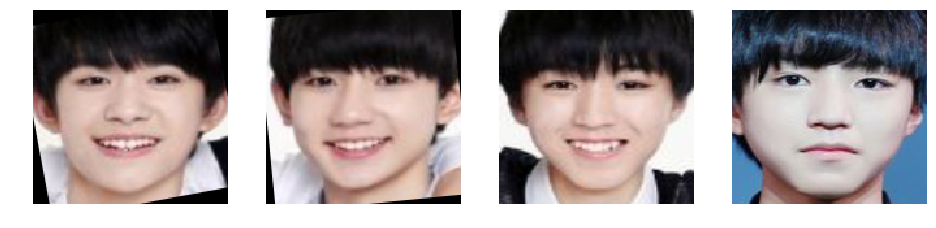

In [9]:
total_faces = np.concatenate([tfboys_faces, wangjukai_face], axis=0)

plt.figure(figsize=(16, 16))
for i, face in enumerate(total_faces):
    plt.subplot(1, 4, i + 1)
    plt.imshow(face)
    plt.axis('off')

### 人脸编码 （人脸图像转换成128位编码）

In [10]:
tfboys_encoding = face_brain.encode_faces(tfboys_faces)
wangjukai_encoding = face_brain.encode_faces(wangjukai_face)

print('tfboys encoding: ', tfboys_encoding.shape)
print('wangjukai_encoding: ', wangjukai_encoding.shape)

tfboys encoding:  (3, 128)
wangjukai_encoding:  (1, 128)


### 人脸对比

#### 比较人脸编码的相似度，越小越相似

In [11]:
face_brain.compare_faces(wangjukai_encoding, tfboys_encoding)

array([1.0448253, 0.732063 , 0.6058923], dtype=float32)

#### 当人脸编码相似度小于threshold 0.7时判断为同一个人

In [13]:
face_brain.recognize_face(wangjukai_encoding, tfboys_encoding, threshold=0.68)

array([False, False,  True])